## Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

In [3]:
import os
os.getcwd()

'/home/ben/projects/SaoPauloBrazilChapter_BrazilianSignLanguage/code/models/landmark/visualization'

In [4]:
os.chdir('../../../')

In [5]:
from models.landmark.visualization.utils2d import (
    visualize_landmark_features as visualize_2d,
)
from models.landmark.visualization.utils3d import (
    visualize_landmark_features as visualize_3d,
)
from models.landmark.visualization.utils2d import (
    visualize_differences as visualize_differences_2d,
)
from models.landmark.visualization.utils3d import (
    visualize_differences as visualize_differences_3d,
)
from models.landmark.utils.utils import minmax_scale_series, minmax_scale_single


In [6]:
example = np.load("../data/preprocessed/landmarks/v4/animal_uf_3.npy", allow_pickle=True)

2025-05-24 09:56:07.579693: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748048167.787298    1461 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748048167.829891    1461 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-24 09:56:08.312136: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [32]:
example_fns = [fn for fn in os.listdir('../data/preprocessed/landmarks/v4/') if fn.endswith('.npy')]
example_fps = ['../data/preprocessed/landmarks/v4/' + fn for fn in example_fns if fn.endswith('.npy')]

In [30]:
import time

### Time Comparison

In [35]:
scale = True
np_dataset = []
np_dataset_xy = []
start_time = time.time()
for example_fp in example_fps:
    example = np.load(example_fp, allow_pickle=True)
    np_series = []
    np_series_xy = {}
    for example_frame in example:
        np_frame = {
            'face_landmarks': [], 
            'pose_landmarks': [], 
            'left_hand_landmarks': [], 
            'right_hand_landmarks': []
        }
        np_frame_xy = {}
        for key in np_frame.keys():
            for lm_point in example_frame[key].landmark:
                x = lm_point.x
                y = lm_point.y
                if scale:
                    x = minmax_scale_single(x, 1.1, -.1, [-1, 1])
                    y = minmax_scale_single(y, 1.3, -.1, [-1, 1])
                np_frame[key].append((x, y))
        np_series.append(np_frame)
        np_frame_xy[key+'_x_y'] = np.array(np_frame[key]).flatten()
    np_dataset.append(np_series)
    np_dataset_xy.append(np_frame_xy)
end_time = time.time()
print(f"Time taken: {end_time - start_time} seconds")
# 29.08, 28.9

Time taken: 29.029016256332397 seconds


In [ ]:
scale = False
scale_series = False
np_dataset = []
np_dataset_xy = []
start_time = time.time()
for example_fp in example_fps:
    example = np.load(example_fp, allow_pickle=True)
    np_series = []
    np_series_xy = {}
    for example_frame in example:
        np_frame = {
            'face_landmarks': [], 
            'pose_landmarks': [], 
            'left_hand_landmarks': [], 
            'right_hand_landmarks': []
        }
        np_frame_xy = {}
        for key in np_frame.keys():
            for lm_point in example_frame[key].landmark:
                x = lm_point.x
                y = lm_point.y
                if scale:
                    x = minmax_scale_single(x, 1.1, -.1, [-1, 1])
                    y = minmax_scale_single(y, 1.1, -.1, [-1, 1])
                np_frame[key].append((x, y))
        np_series.append(np_frame)
        np_series_xy[key+'_x_y'] = np.array(np_frame[key]).flatten()
    np_dataset.append(np_series)
    np_dataset_xy.append(np_series_xy)
if scale_series:
    np_dataset_xy_scaled = []
    for series in np_dataset_xy:
        np_series_xy_scaled = {}
        for key in series.keys():
            input_max, input_min, max_val, min_val = 1.1, -.1, -1, 1
            values = series[key]
            scaled = (values - input_min) / (input_max - input_min) * (max_val - min_val) + min_val
            scaled = np.clip(scaled, min_val, max_val)
            np_series_xy_scaled[key] = scaled
        np_dataset_xy_scaled.append(np_series_xy_scaled)
end_time = time.time()
print(f"Time taken: {end_time - start_time} seconds")
# 8.259, 8.7, 8.44

Time taken: 8.442133665084839 seconds


In [54]:
scale = False
scale_series = True
np_dataset = []
np_dataset_xy = []
start_time = time.time()
for example_fp in example_fps:
    example = np.load(example_fp, allow_pickle=True)
    np_series = []
    np_series_xy = {}
    for example_frame in example:
        np_frame = {
            'face_landmarks': [], 
            'pose_landmarks': [], 
            'left_hand_landmarks': [], 
            'right_hand_landmarks': []
        }
        np_frame_xy = {}
        for key in np_frame.keys():
            for lm_point in example_frame[key].landmark:
                x = lm_point.x
                y = lm_point.y
                if scale:
                    x = minmax_scale_single(x, 1.1, -.1, [-1, 1])
                    y = minmax_scale_single(y, 1.3, -.1, [-1, 1])
                np_frame[key].append((x, y))
        np_series.append(np_frame)
        if np_series_xy.get(key+'_x_y') is None:
            np_series_xy[key+'_x_y'] = []
        np_series_xy[key+'_x_y'].append(np.array(np_frame[key]).flatten())
    np_dataset.append(np_series)
    np_dataset_xy.append(np_series_xy)
if scale_series:
    np_dataset_xy_scaled = []
    for series in np_dataset_xy:
        np_series_xy_scaled = {}
        for key in series.keys():
            np_series_xy_scaled[key] = minmax_scale_series(series[key], 1.1, -.1, [-1, 1])
        np_dataset_xy_scaled.append(np_series_xy_scaled)
end_time = time.time()
print(f"Time taken: {end_time - start_time} seconds")
# 8.655, 8.365, 8.363

Time taken: 9.730523586273193 seconds


In [56]:
np_series_xy_scaled.keys()

dict_keys(['right_hand_landmarks_x_y'])

In [57]:
np_dataset_xy[-1]

{'right_hand_landmarks_x_y': [array([0.39671651, 0.68500525, 0.44658351, 0.71361905, 0.48112446,
         0.70976561, 0.50244951, 0.70317107, 0.51917046, 0.70289499,
         0.50234896, 0.6316182 , 0.55455488, 0.62824863, 0.56922138,
         0.64388645, 0.57625568, 0.65418363, 0.49059564, 0.62740755,
         0.53865498, 0.65247029, 0.53702545, 0.67867434, 0.53126854,
         0.69006503, 0.47622865, 0.63715482, 0.51217824, 0.68658763,
         0.50203252, 0.71855319, 0.48892772, 0.73415822, 0.46085685,
         0.65515941, 0.48402131, 0.69805181, 0.47916162, 0.72469234,
         0.47004944, 0.73964018]),
  array([0.36275724, 0.68805212, 0.41248521, 0.705769  , 0.44805646,
         0.69985652, 0.47152948, 0.69537795, 0.48997629, 0.69685119,
         0.46205038, 0.62612009, 0.51007736, 0.64016384, 0.530083  ,
         0.66449964, 0.53930247, 0.68381345, 0.45853555, 0.62607652,
         0.50447744, 0.66568339, 0.50596786, 0.70247322, 0.49800259,
         0.72553653, 0.45265019, 0.63912

In [84]:
scale = False
scale_series = False
np_dataset = []
np_dataset_xy = []
start_time = time.time()
for example_fp in example_fps:
    example = np.load(example_fp, allow_pickle=True)
    np_series = []
    np_series_xy = {}
    for example_frame in example:
        np_frame = {
            'face_landmarks': [], 
            'pose_landmarks': [], 
            'left_hand_landmarks': [], 
            'right_hand_landmarks': []
        }
        np_frame_xy = {}
        for key in np_frame.keys():
            for lm_point in example_frame[key].landmark:
                x = lm_point.x
                y = lm_point.y
                if scale:
                    x = minmax_scale_single(x, 1.1, -.1, [-1, 1])
                    y = minmax_scale_single(y, 1.1, -.1, [-1, 1])
                np_frame[key].append((x, y))
        np_series.append(np_frame)
        np_series_xy[key+'_x_y'] = np.array(np_frame[key]).flatten()
    np_dataset.append(np_series)
    np_dataset_xy.append(np_series_xy)
if scale_series:
    np_dataset_xy_scaled = []
    for series in np_dataset_xy:
        np_series_xy_scaled = {}
        for key in series.keys():
            input_max, input_min, max_val, min_val = 1.1, -.1, -1, 1
            values = series[key]
            scaled = (values - input_min) / (input_max - input_min) * (max_val - min_val) + min_val
            scaled = np.clip(scaled, min_val, max_val)
            np_series_xy_scaled[key] = scaled
        np_dataset_xy_scaled.append(np_series_xy_scaled)
end_time = time.time()
print(f"Time taken: {end_time - start_time} seconds")
# 8.259, 8.7, 8.44

Time taken: 8.442133665084839 seconds


In [101]:
scale = False
scale_series = False
np_dataset = []
np_dataset_xy = []
start_time = time.time()
for example_fp in example_fps:
    example = np.load(example_fp, allow_pickle=True)
    np_series = []
    np_series_xy = {}
    for example_frame in example:
        np_frame = {
            'face_landmarks': [], 
            'pose_landmarks': [], 
            'left_hand_landmarks': [], 
            'right_hand_landmarks': []
        }
        np_frame_xy = {}
        for key in np_frame.keys():
            for lm_point in example_frame[key].landmark:
                x = lm_point.x
                y = lm_point.y
                z = lm_point.z
                if scale:
                    x = minmax_scale_single(x, 1.1, -.1, [-1, 1])
                    y = minmax_scale_single(y, 1.1, -.1, [-1, 1])
                np_frame[key].append((x, y, z))
        np_series.append(np_frame)
        np_series_xy[key+'_x_y'] = np.array(np_frame[key]).flatten()
    np_dataset.append(np_series)
    np_dataset_xy.append(np_series_xy)
if scale_series:
    np_dataset_xy_scaled = []
    for series in np_dataset_xy:
        np_series_xy_scaled = {}
        for key in series.keys():
            input_max, input_min, max_val, min_val = 1.1, -.1, -1, 1
            # values = series[key]
            # scaled = (values - input_min) / (input_max - input_min) * (max_val - min_val) + min_val
            # scaled = np.clip(scaled, min_val, max_val)
            # np_series_xy_scaled[key] = scaled
        np_dataset_xy_scaled.append(series[key])
end_time = time.time()
print(f"Time taken: {end_time - start_time} seconds")
# 8.618, 8.866, 8.49

Time taken: 12.049115657806396 seconds


### ENd of Time Comparison

### Reduce to Array

In [11]:
scaling_info = {
"scale_range": [-1, 1],
"min_for_scaling_x": -0.1,
"max_for_scaling_x": 1.1,
"min_for_scaling_y": -0.1,
"max_for_scaling_y": 1.3
}

In [26]:
series_fns = [fn for fn in os.listdir('../data/preprocessed/landmarks/v4/') if fn.endswith('.npy')]
series_fps = ['../data/preprocessed/landmarks/v4/' + fn for fn in series_fns if fn.endswith('.npy')]

In [125]:
key = 'pose_landmarks'
key = 'left_hand_landmarks'
key = 'right_hand_landmarks'
scaled = True
load_path = '../data/preprocessed/landmarks/v4/'
save_path = '../modelling/landmark_arrays/'
temp_store_series_xyz = []

for series_fn in series_fns:

    series_fp = load_path + series_fn
    series = np.load(series_fp, allow_pickle=True)
    series_xyz = []
    
    for frame in series:
        xyz = [[lm.x, lm.y, lm.z] for lm in frame[key].landmark]
        xyz = np.array(xyz)
        series_xyz.append(xyz)
    series_xyz = np.array(series_xyz)

    if scaled:
        # scale x
        series_xyz[:,:,0] = minmax_scale_series(
            series_xyz[:,:,0],
            scaling_info['max_for_scaling_x'],
            scaling_info['min_for_scaling_x'],
            scaling_info['scale_range']
        )
        # scale y
        series_xyz[:,:,1] = minmax_scale_series(
            series_xyz[:,:,1],
            scaling_info['max_for_scaling_y'],
            scaling_info['min_for_scaling_y'],
            scaling_info['scale_range'])
        
    np.save(save_path + series_fn.replace('.npy', f'_{key}.npy'), series_xyz)
    temp_store_series_xyz.append(series_xyz)

In [62]:
np.set_printoptions(suppress=True)

### Visualization

In [29]:
import os
from models.landmark.utils.utils import load_config

configs_dir = "models/landmark/configs"
hand_angles = load_config(os.path.join(configs_dir, "features/angles.yaml"), "hand")['angles']['hand']
hand_differences = load_config(
    os.path.join(configs_dir, "features/differences.yaml"), "hand"
)['differences']['hand']
hand_distances = load_config(
    os.path.join(configs_dir, "features/distances.yaml"), "hand"
)['distances']['hand']
pose_angles = load_config(os.path.join(configs_dir, "features/angles.yaml"), "pose")['angles']['pose']
pose_differences = load_config(
    os.path.join(configs_dir, "features/differences.yaml"), "pose"
)['differences']['pose']
pose_distances = load_config(
    os.path.join(configs_dir, "features/distances.yaml"), "pose"
)['distances']['pose']

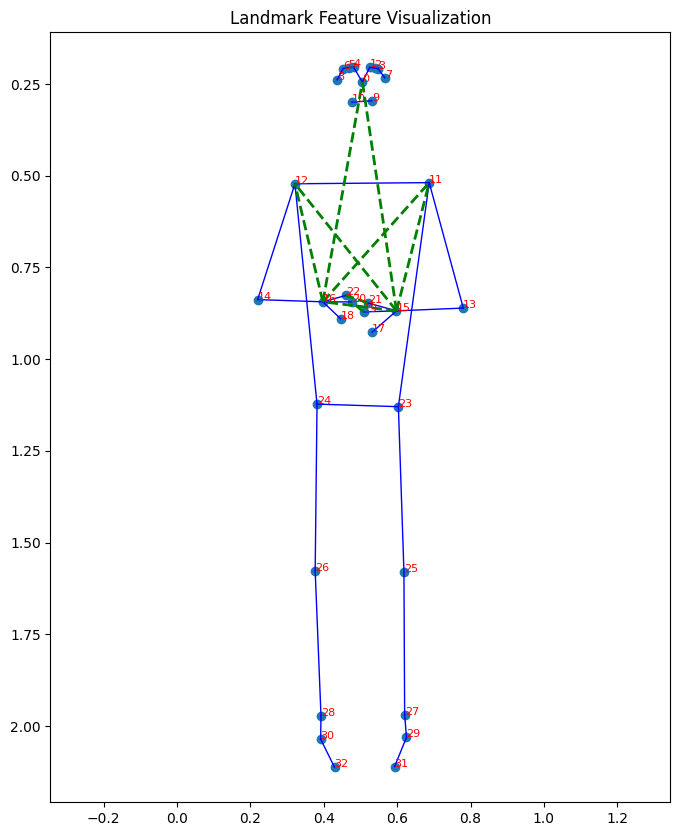

In [31]:
visualize_2d(example[0]["pose_landmarks"], "pose", distances=pose_distances.values())

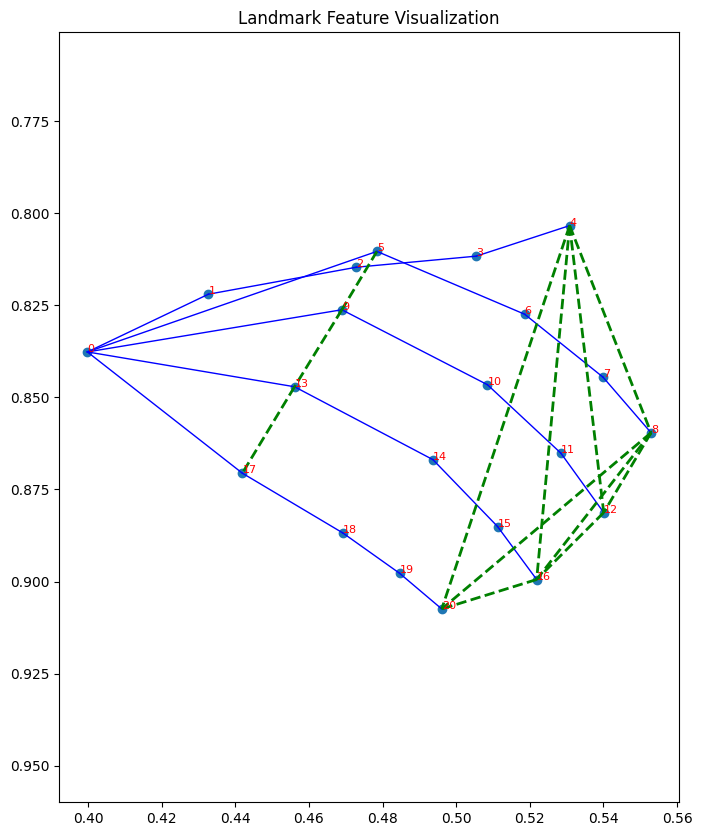

In [32]:
visualize_2d(
    example[0]["right_hand_landmarks"], "hand", distances=hand_distances.values()
)

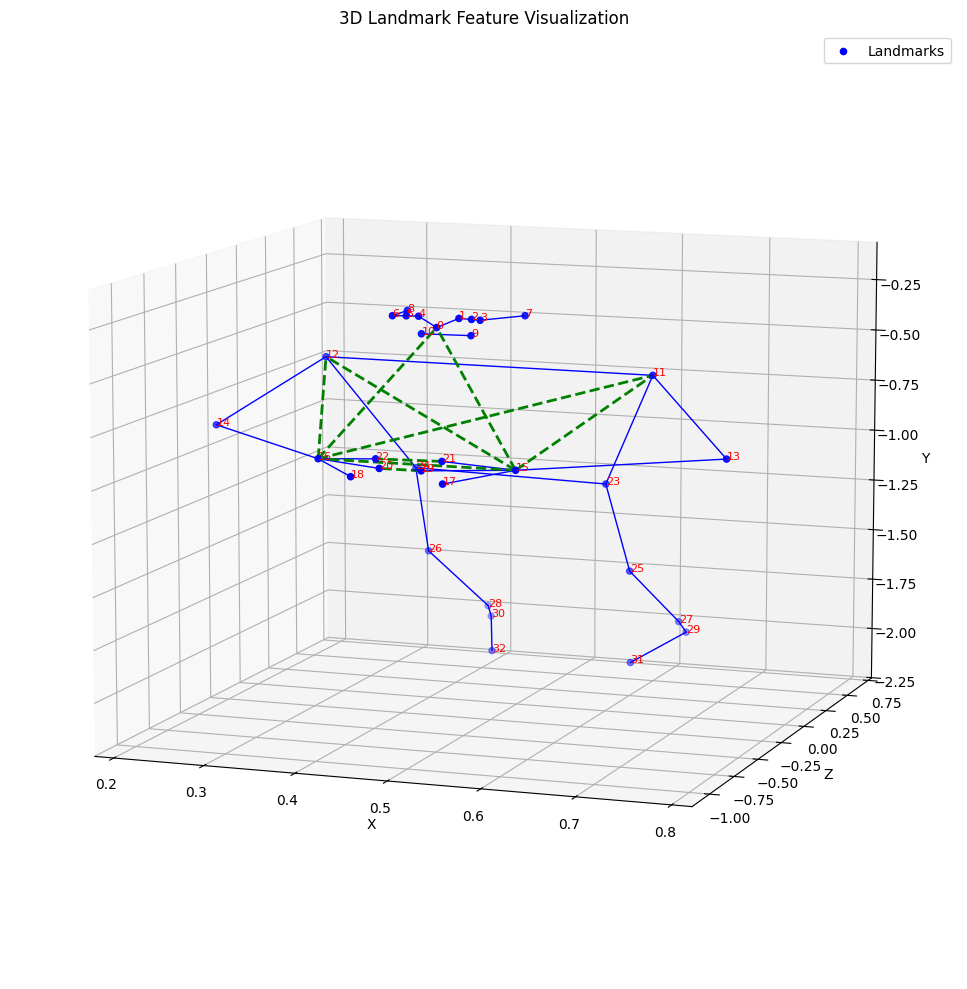

In [33]:
visualize_3d(example[0]["pose_landmarks"], "pose", distances=pose_distances.values())

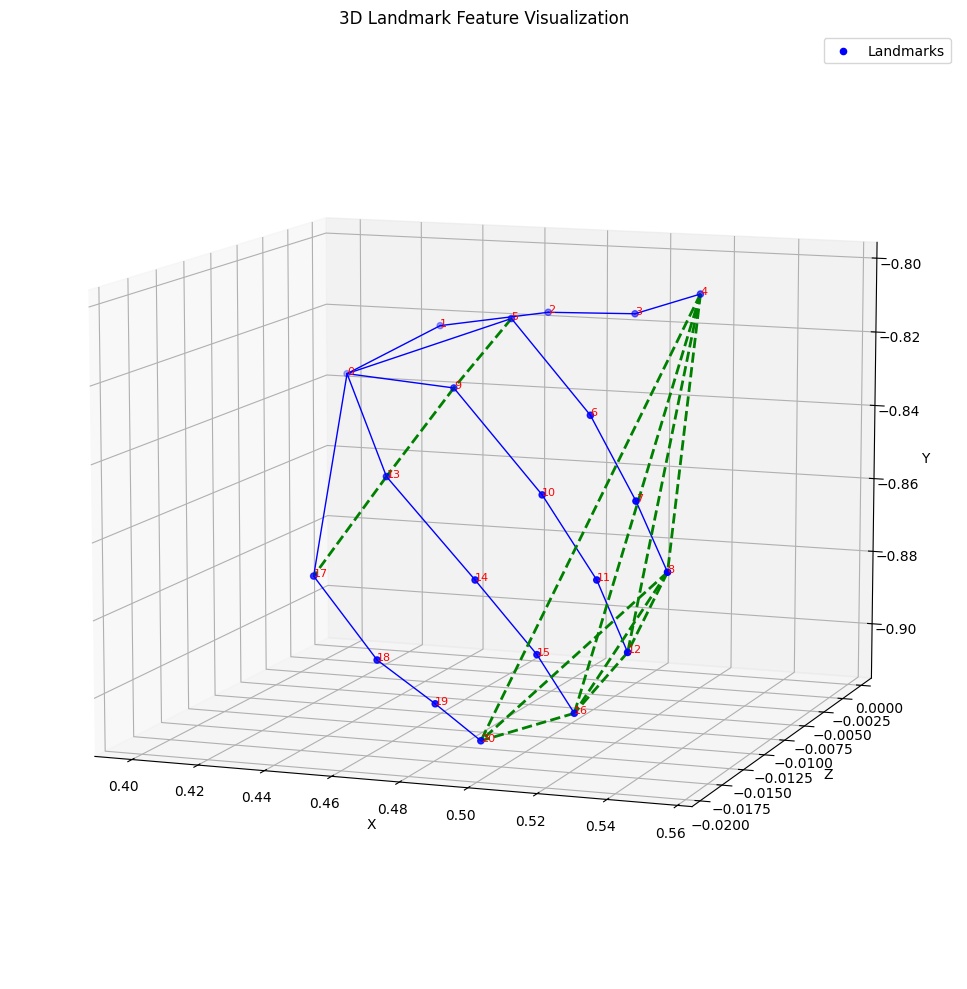

In [34]:
visualize_3d(
    example[0]["right_hand_landmarks"], "hand", distances=hand_distances.values()
)

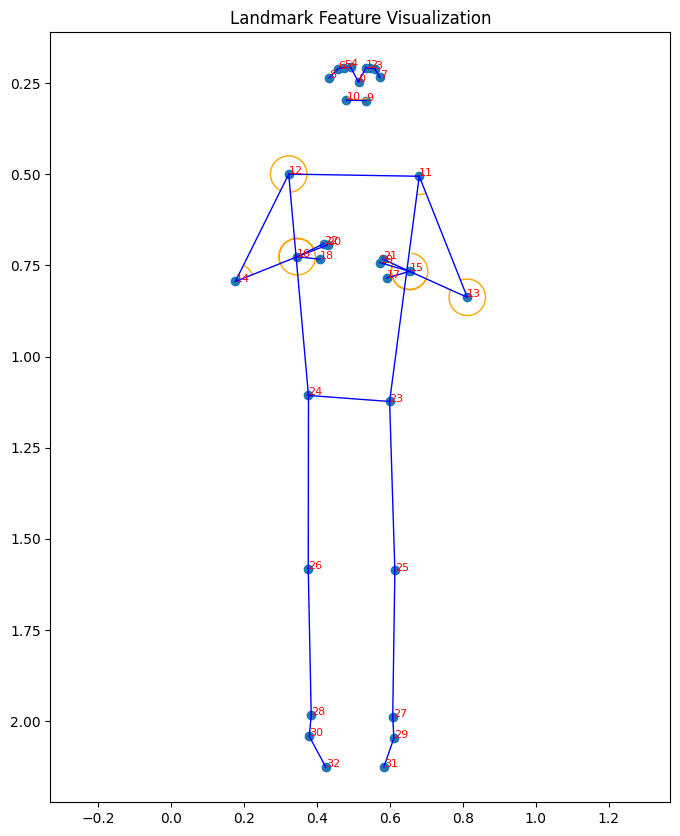

In [39]:
visualize_2d(example[70]["pose_landmarks"], "pose", angles=pose_angles.values())

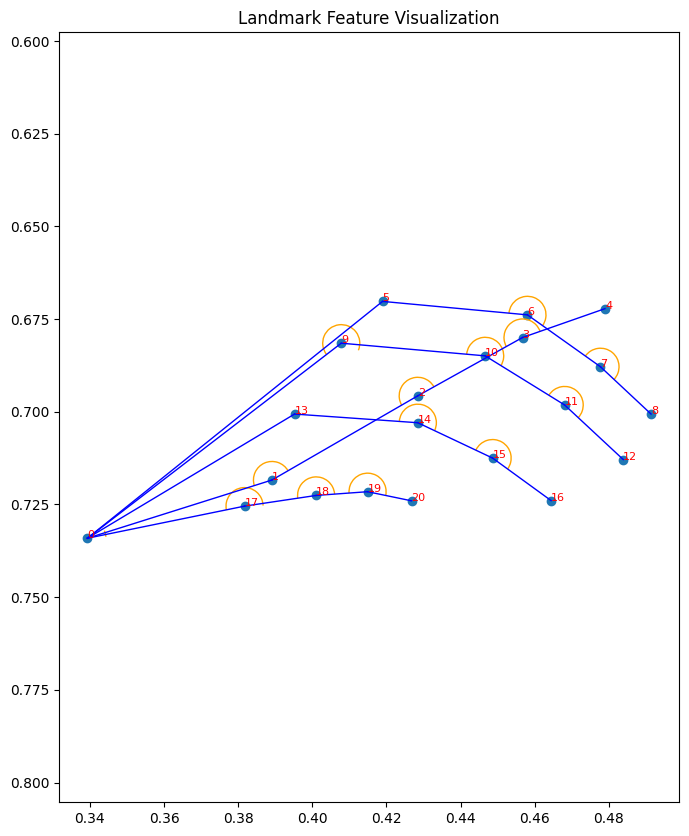

In [36]:
visualize_2d(example[70]["right_hand_landmarks"], "hand", angles=hand_angles.values())

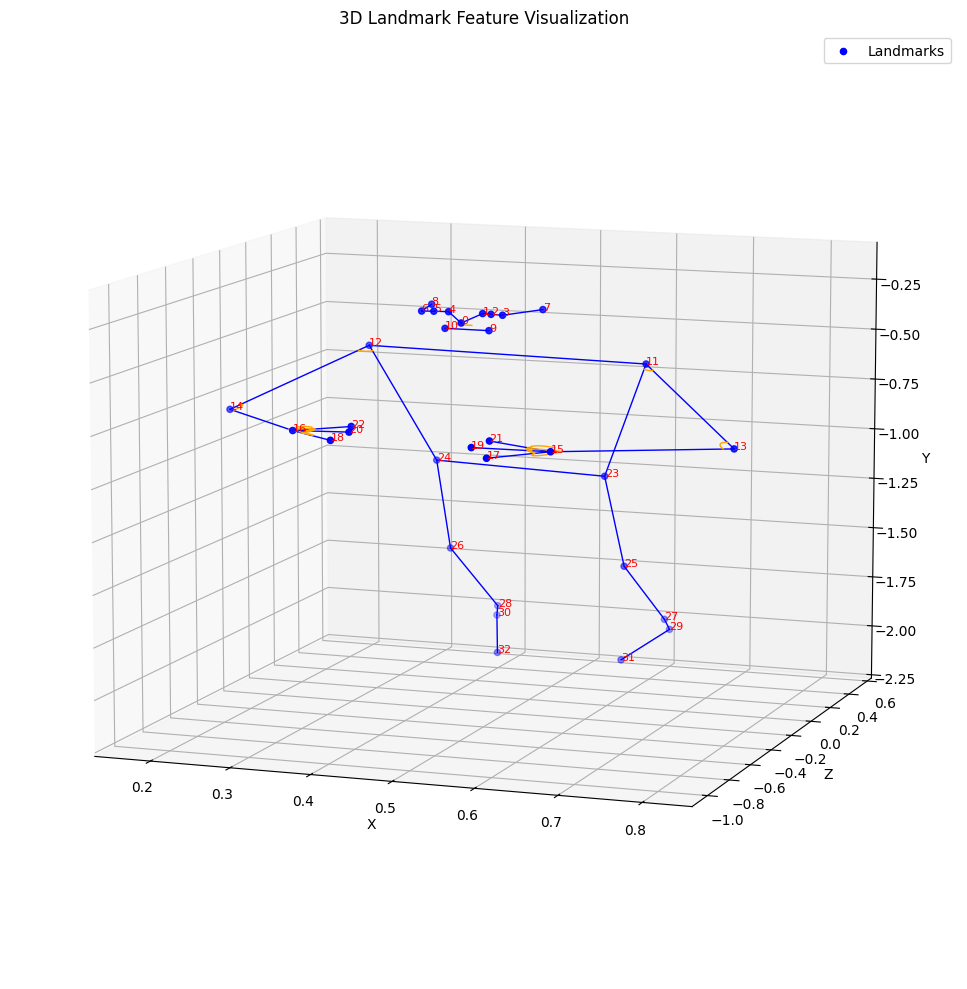

In [41]:
visualize_3d(example[70]["pose_landmarks"], "pose", angles=pose_angles.values())

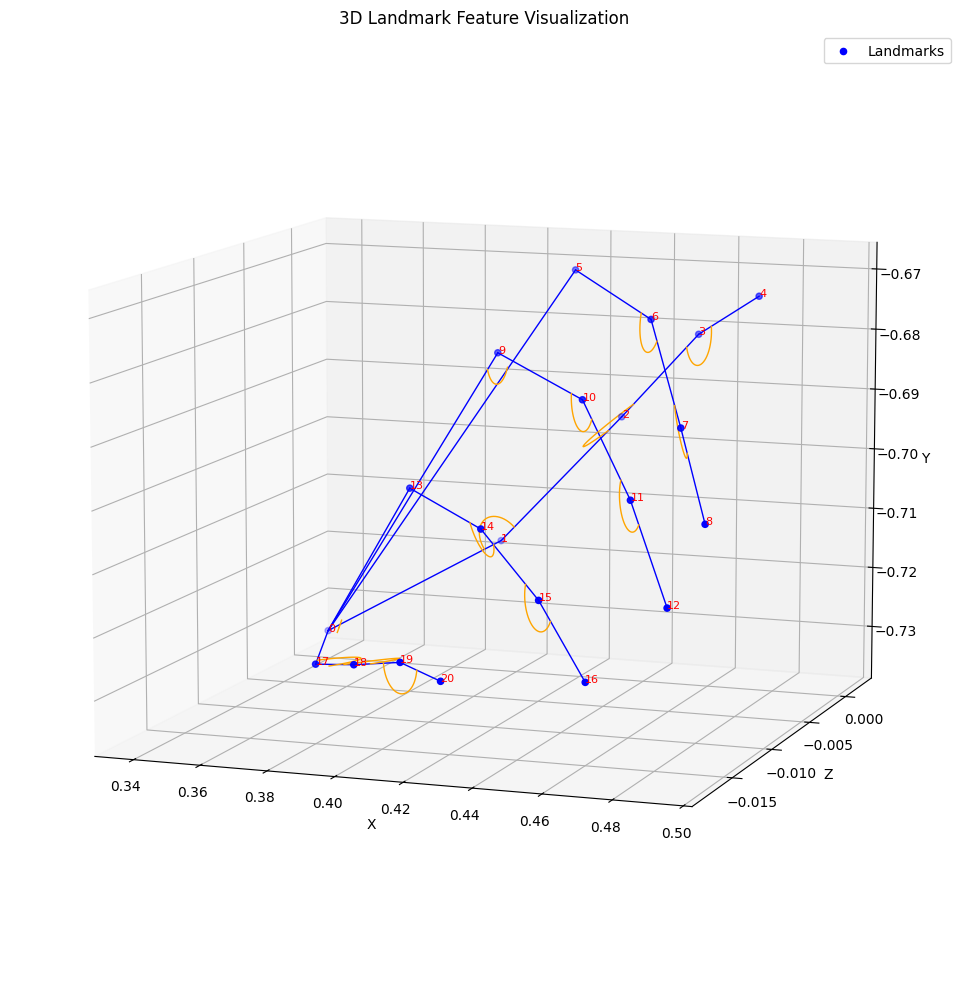

In [40]:
visualize_3d(example[70]["right_hand_landmarks"], "hand", angles=hand_angles.values())

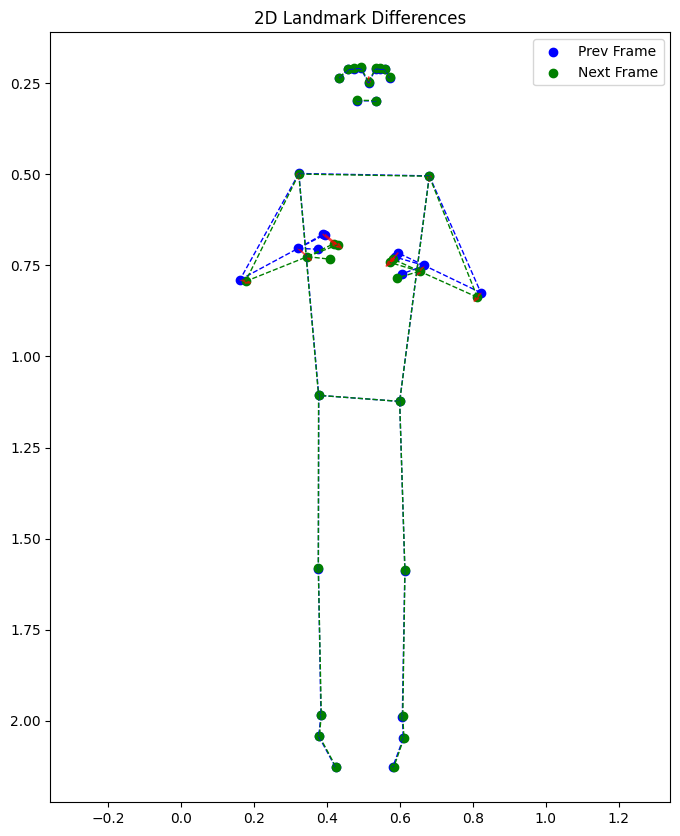

In [42]:
visualize_differences_2d(
    example[69]["pose_landmarks"],
    example[70]["pose_landmarks"],
    "pose",
    landmark_differences=pose_differences.values(),
)

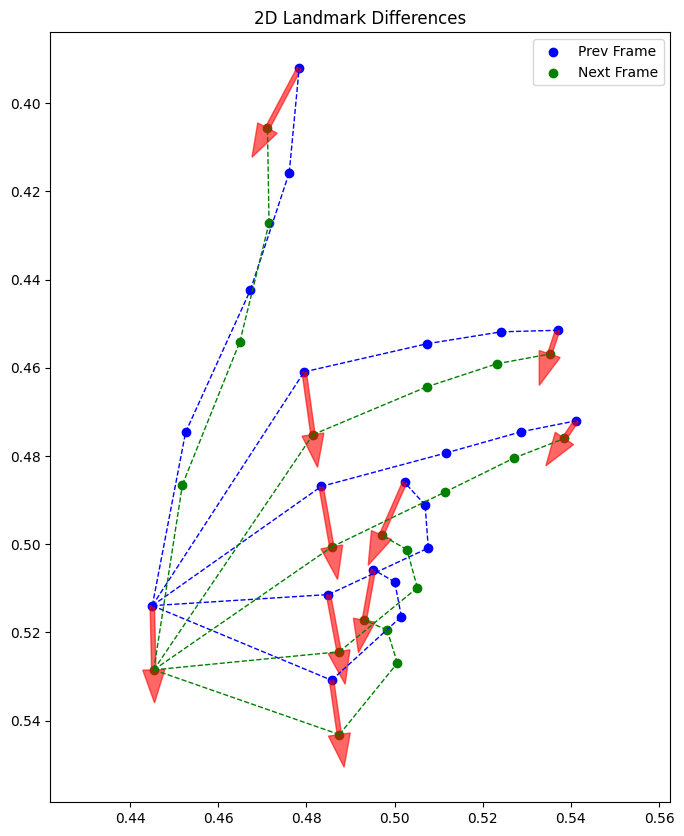

In [31]:
visualize_differences_2d(
    example[69]["right_hand_landmarks"],
    example[70]["right_hand_landmarks"],
    "hand",
    landmark_differences=hand_differences.values(),
)

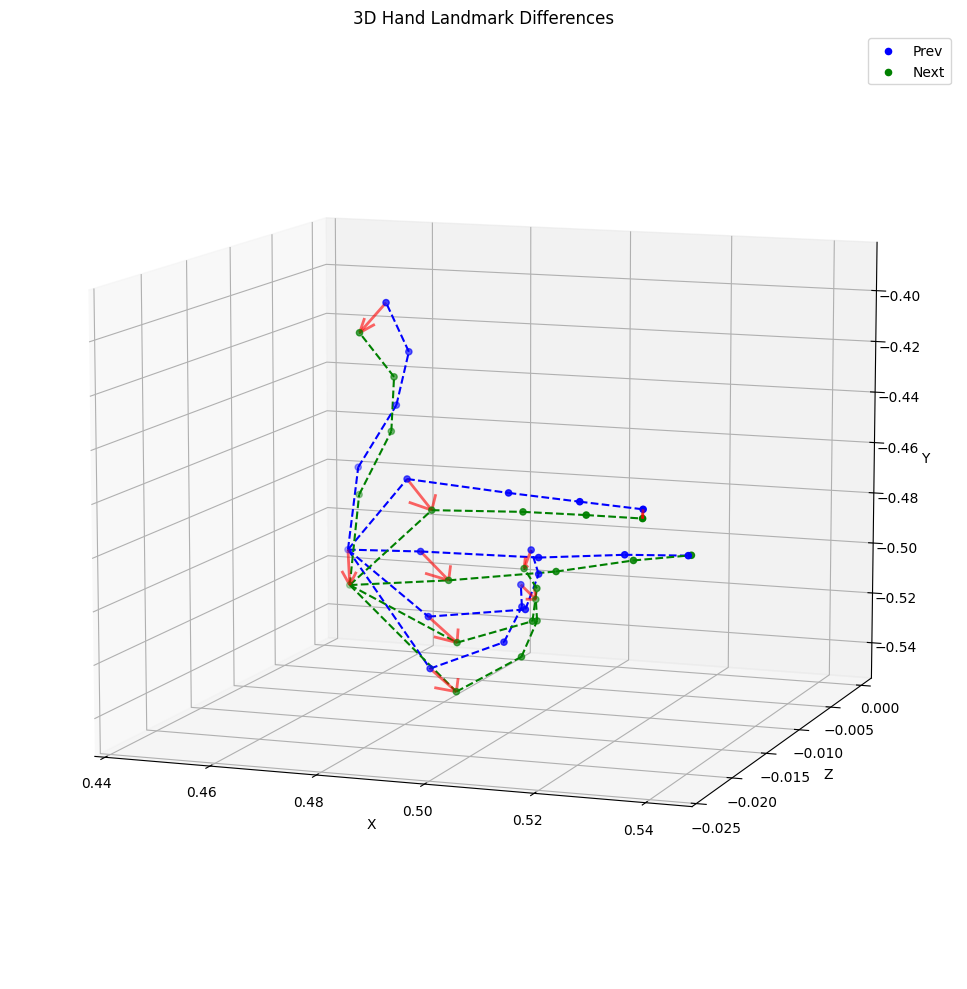

In [42]:
visualize_differences_3d(
    example[69]["right_hand_landmarks"],
    example[70]["right_hand_landmarks"],
    "hand",
    landmark_differences=hand_differences.values(),
)

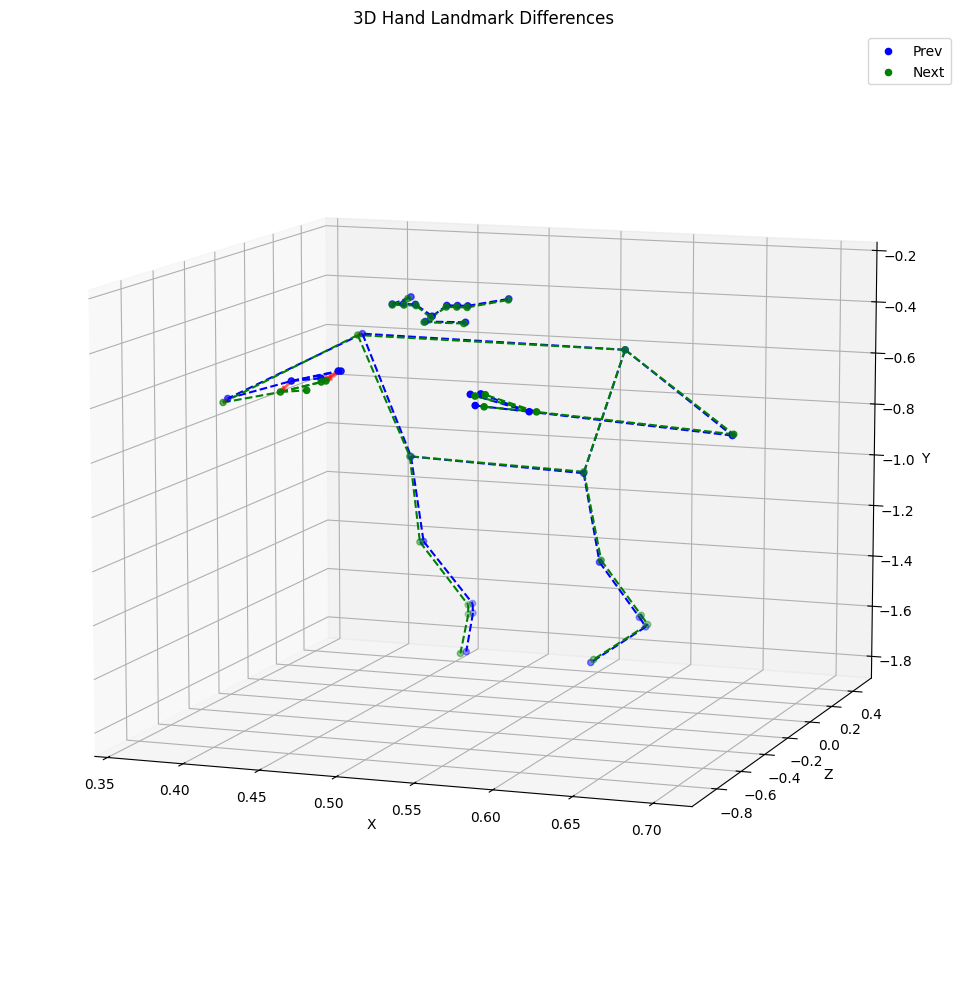

In [43]:
visualize_differences_3d(
    example[69]["pose_landmarks"],
    example[70]["pose_landmarks"],
    "pose",
    landmark_differences=pose_differences.values(),
)